# **ONLINE RETAIL CAPSTONE PROJECT**

## **DESCRIPTION**

## **Problem Statement**
It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).

## **Dataset Description**
This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

Variables:	       Description <br>
InvoiceNo:	     Invoice number. Nominal, a six digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation <br>
StockCode:	    Product (item) code. Nominal, a five digit integral number uniquely assigned to each distinct product <br>
Description:	 Product (item) name. Nominal <br>
Quantity:	      The quantities of each product (item) per transaction. Numeric <br>
InvoiceDate:	Invoice Date and time. Numeric, the day and time when each transaction was generated <br>
UnitPrice:        Unit price. Numeric, product price per unit in sterling <br>
CustomerID	   Customer number. Nominal, a six digit integral number uniquely assigned to each customer <br>
Country	           Country name. Nominal, the name of the country where each customer resides <br>

## 1. Perform a preliminary data inspection and data cleaning.

<img src="data-cleansing.jpg" alt="Drawing" style="width: 450px;height:250px;text-align: left"/>

Load the necessary libraries.


In [95]:
import numpy as np
import pandas as pd
data = pd.read_excel('Online Retail.xlsx')

In [96]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Gives a preview of outliers. Any column whose mean is not  around 50% is an outlier

In [99]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Gives us an idea of the type of data and the missing values

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### a. Check for missing data and formulate an apt strategy to treat them.

Observe the missing data in this UK retail sheet. <br>
     1. Customer ID and description having missing values

In [101]:
typecol = ['Categorical', 'Categorical','Categorical', 'Discrete', 'Date', 'Continuous' , 'Categorical' , 'Categorical' ]
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'Type of data' : typecol, 'No of missing data' : data.isna().sum()})
def highlight_max(s):
    is_max = s 
    return ['background-color: pink' if v else '' for v in is_max]
missingdf.style.apply(highlight_max, subset = ['No of missing data'])
missingdf.style.hide_index()

C:\Users\Shreya\AppData\Local\Temp\ipykernel_19244\3468921664.py:7: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  missingdf.style.hide_index()


Columns,Type of data,No of missing data
InvoiceNo,Categorical,0
StockCode,Categorical,0
Description,Categorical,1454
Quantity,Discrete,0
InvoiceDate,Date,0
UnitPrice,Continuous,0
CustomerID,Categorical,135080
Country,Categorical,0


 Handling missing data Treatment. <br>
         1. We will drop all the records where the customer ID is Null as it has no significance
         2. The records where Description is Null will be automatically treated when discarding records with missing values of customer ID
         3. Customer ID and description now do not having missing values after treatment
 

In [102]:
print ("No of records before dropping customer ID column")
print (len(data))
data.drop(data[data['CustomerID'].isna()].index, inplace = True)
data.reset_index(drop=True)
print ("No of records after dropping customer ID column")
print (len(data))
print ("Is there any missing data in Description column after dropping the Null Customer ID columns")
print (any(data['Description'].isna()==True))
missingdf = pd.DataFrame({'Columns' : data.columns.to_list(), 'No of missing data after cleaning' : data.isna().sum()})
missingdf.style.hide_index()

No of records before dropping customer ID column
541909
No of records after dropping customer ID column
406829
Is there any missing data in Description column after dropping the Null Customer ID columns
False


C:\Users\Shreya\AppData\Local\Temp\ipykernel_19244\1142630559.py:10: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  missingdf.style.hide_index()


Columns,No of missing data after cleaning
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


###  b. Remove duplicate data records.

In [103]:
print ("No of records before dropping duplicate records")
print (len(data))
data.drop_duplicates(inplace=True)
data.reset_index(drop=True)
print ("No of records after dropping duplicate records")
print (len(data))

No of records before dropping duplicate records
406829
No of records after dropping duplicate records
401604


### c. Remove the transactions of the last month in year 2011 as they have only data for 9 days

In [104]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,x.day) 
print ("No of records before dropping the transactions of the last month")
print (len(data))

# Create InvoiceMonth column
data['InvoiceMonth'] = data['InvoiceDate'].apply(get_month)
data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)]
data.drop(data[data['InvoiceMonth'] > datetime.datetime(2011,11,30)].index, inplace = True)

data.reset_index(drop=True)
print ("No of records after dropping the transactions of the last month")
print (len(data))

No of records before dropping the transactions of the last month
401604
No of records after dropping the transactions of the last month
384222


### d. Perform descriptive analytics on the given data

Observe the countries that have most of the customers residing

In [105]:
data.Country.value_counts(normalize=True).head(10).mul(100).round(2).astype(str) + ' %'

United Kingdom    88.73 %
Germany            2.38 %
France             2.12 %
EIRE               1.86 %
Spain              0.64 %
Netherlands        0.59 %
Belgium            0.51 %
Switzerland        0.49 %
Portugal           0.36 %
Australia          0.33 %
Name: Country, dtype: object

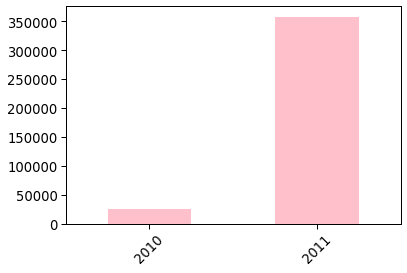

In [106]:
data.InvoiceDate.dt.year.value_counts(sort=False).plot(kind='bar', rot=45, color='pink');


Let us visualize the customer trend on a monthly basis in the year 2011

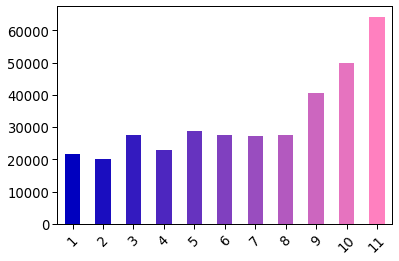

In [107]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False)))]
data[data.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar', rot=45, color=my_colors);

Visualize the Items contributing to maximum Price Value

C:\Users\Shreya\AppData\Local\Temp\ipykernel_19244\2347732985.py:2: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  df =data.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()


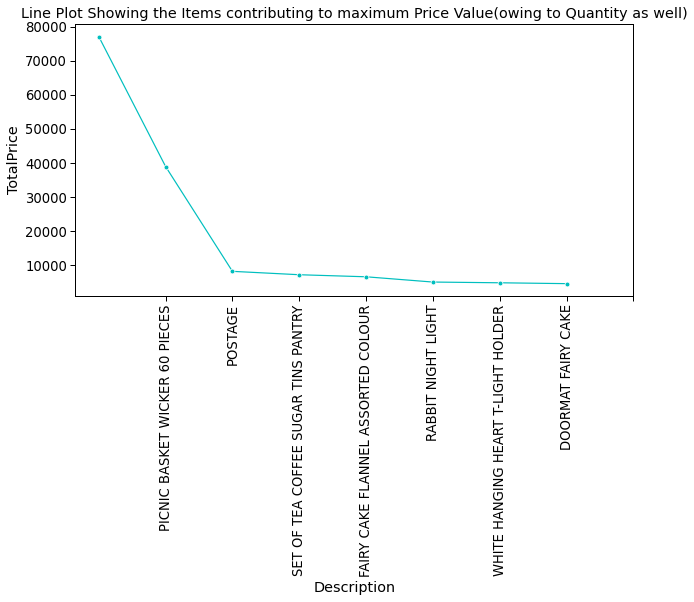

In [108]:
data['TotalPrice'] = data.Quantity * data.UnitPrice
df =data.TotalPrice.sort_values(ascending=False).head(10).to_frame().style.hide_index()
desc = data.sort_values(by='TotalPrice', ascending=False)['Description'].head(10)
price = data.sort_values(by='TotalPrice', ascending=False)['TotalPrice'].head(10)
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(y=price,x=desc, marker='o', color='c',).set_title('Line Plot Showing the Items contributing to maximum Price Value(owing to Quantity as well)')
plt.xticks(range(1,9), rotation=90)
plt.show();


Let us explore the data some more!

In [109]:
print ("First business transaction date is {}".format(data.InvoiceDate.min()))
print ("Last business transaction  date is {}".format(data.InvoiceDate.max()))
monthly_gross =data[data.InvoiceDate.dt.year==2011].groupby(data.InvoiceDate.dt.month).TotalPrice.sum()
df = pd.DataFrame(monthly_gross)
df.index.name = 'Invoice Month'
df


First business transaction date is 2010-12-01 08:26:00
Last business transaction  date is 2011-11-30 17:42:00


,TotalPrice
Invoice Month,
1,473731.900
2,435534.070
3,578576.210
4,425222.671
5,647011.670
6,606862.520
7,573112.321
8,615078.090
9,929356.232


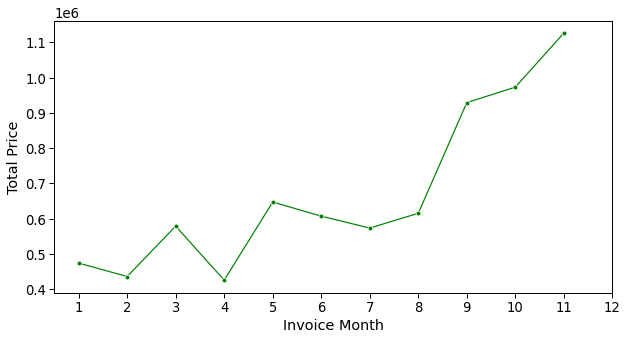

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.lineplot(y=monthly_gross.values,x=monthly_gross.index, marker='o', color='g');
plt.xlabel('Invoice Month')
plt.ylabel('Total Price')
plt.xticks(range(1,13))
plt.show();


Let's visualize some top products from the whole range.

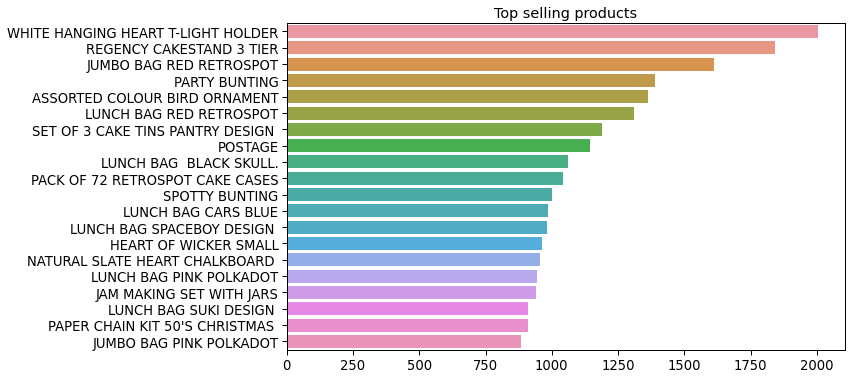

In [111]:
top_products = data['Description'].value_counts()[:20]
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values)
plt.title("Top selling products")
plt.show();

In [112]:
pd.DataFrame(data['Description'].value_counts())

,Description
WHITE HANGING HEART T-LIGHT HOLDER,2005
REGENCY CAKESTAND 3 TIER,1843
JUMBO BAG RED RETROSPOT,1613
PARTY BUNTING,1391
ASSORTED COLOUR BIRD ORNAMENT,1363
...,...
PINK FLOCK PHOTO FRAME,1
BLING KEY RING STAND,1
LASER CUT MULTI STRAND NECKLACE,1
WHITE ROSEBUD & PEARL NECKLACE,1



#### Observe Outliers using  the 1.5 Interquartile Rule
Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:

    1. Calculate the interquartile range for the data.
    2. Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
    3. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
    4. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

Remember that the interquartile rule is only a rule of thumb that generally holds but does not apply to every case. In general, you should always follow up your outlier analysis by studying the resulting outliers to see if they make sense. Any potential outlier obtained by the interquartile method should be examined in the context of the entire set of data.

In [113]:
def outlierDetection(datacolumn):
    #Sort the data in ascending order
    sorted(datacolumn)
    
    #GET Q1 and Q3
    Q1,Q3 = np.percentile(datacolumn, [25,75])
    
    #Calc IQR
    IQR = Q3 - Q1
    
    #Calc LowerRange
    lr = Q1 - (1.5 * IQR)
    
    #Calc Upper Range
    ur = Q3 + (1.5 * IQR)
    
    return lr,ur

#Outliers detection are considered only for numeric columns.ie Quantity , Unit Price and Total Price

def outlier_treatment(drop_col = False): 
    for col in data.columns[[3,5,8]]:
        lowerRange,upperRange = outlierDetection(data[col])
        if not data[(data[col] > upperRange) | (data[col] < lowerRange)].empty:
            print ("Detected  outliers for this column %r " % col)
            #hdataUpdated.drop(hdataUpdated[(hdataUpdated[col] > upperRange) | (hdataUpdated[col] < lowerRange)].index , inplace=drop_col)



## 2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

a. Create month cohorts and analyze active customers for each cohort.

### COHORT ANALYSIS

<img src="cohort.jpg" alt="Drawing" style="width: 600px;height:200px"/>

In [114]:
cohort =data.copy()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30,-0.85
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30,-3.29
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30,-1.25
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-30,-7.95


Assign monthly acquisition cohort
Defining a cohort is the first step to cohort analysis. We will now create monthly cohorts based on the month each customer has made their first transactio

In [115]:
# Define a function that will parse the date
import datetime
def get_month(x):
    return datetime.datetime(x.year,x.month,1) 

# Create InvoiceMonth column
cohort['InvoiceMonth'] = cohort['InvoiceDate'].apply(get_month) 

# Group by CustomerID and select the InvoiceMonth value
grouping = cohort.groupby('CustomerID')['InvoiceMonth']

# Assign a minimum InvoiceMonth value to the dataset
cohort['CohortMonth'] = grouping.transform('min')

In [116]:
cohort
#grouping

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01


Calculate time offset in months

In [117]:
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    return year, month

# Get the integers for date parts from the `InvoiceMonth` column
invoice_year, invoice_month = get_date_int(cohort,'InvoiceMonth')

# Get the integers for date parts from the `CohortMonth` column
cohort_year, cohort_month = get_date_int(cohort,'CohortMonth')

In [118]:
print ("Unique terms for Cohort Year is {} " .format(cohort_year.unique()))
print ("Unique terms for Cohort Month is {} " .format(cohort_month.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_year.unique()))
print ("Unique terms for Invoice Year is {} " .format(invoice_month.unique()))


Unique terms for Cohort Year is [2010 2011] 
Unique terms for Cohort Month is [12  1  2  3  4  5  6  7  8  9 10 11] 
Unique terms for Invoice Year is [2010 2011] 
Unique terms for Invoice Year is [12  1  2  3  4  5  6  7  8  9 10 11] 


In [119]:
# Calculate difference in years
years_diff = invoice_year - cohort_year

# Calculate difference in months
months_diff = invoice_month - cohort_month

# Extract the difference in months from all previous values
cohort['CohortIndex'] = years_diff * 12 + months_diff + 1

In [120]:
#THis Cohort Index will give us an idea on the time difference in months between the customer's first purchase and the customer's current purchase
cohort['CohortIndex'].unique()
cohort

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-01,-0.85,2011-03-01,9
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-01,-3.29,2011-03-01,9
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-01,-1.25,2010-12-01,12
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-01,-7.95,2010-12-01,12


Calculate retention rate


In [126]:
grouping = cohort.groupby(['CohortMonth', 'CohortIndex'])


In [127]:
# Count the number of unique values per customer ID
#cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique).reset_index()

# Create a pivot 
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Select the first column and store it to cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]

# Divide the cohort count by cohort sizes along the rows
retention = cohort_counts.divide(cohort_sizes, axis=0)*100
#print (cohort[cohort['CohortMonth']=='2011-12-01']['CustomerID'].nunique()) #Verifies 41 against this month
#cohort_sizes
retention.index = retention.index.date


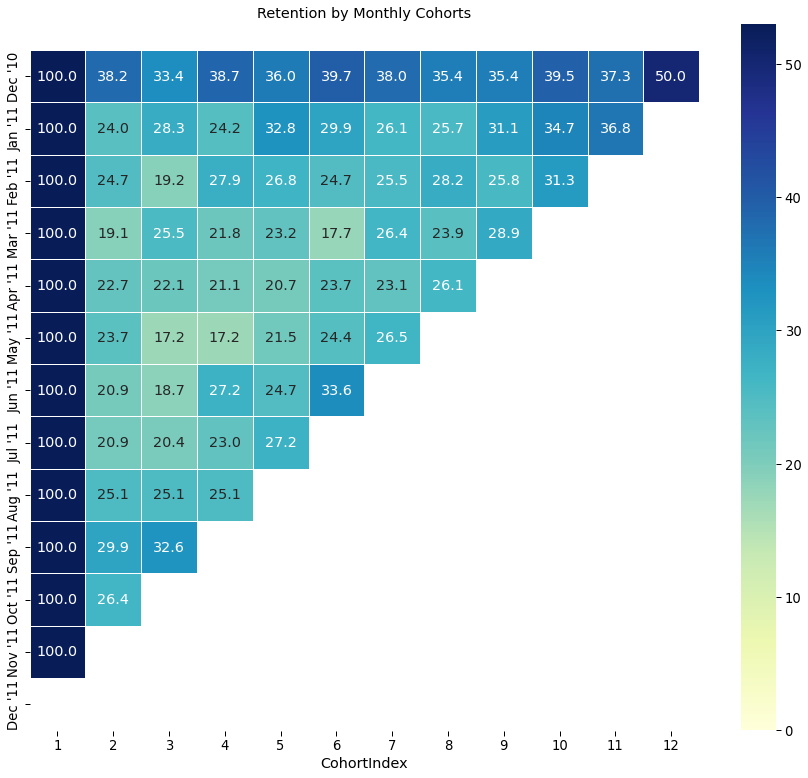

<Figure size 432x288 with 0 Axes>

In [128]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

# Initialize inches plot figure
plt.figure(figsize=(15,13))

# Add a title
plt.title('Retention by Monthly Cohorts')

# Create the heatmap
ax = sns.heatmap(data=retention,
            annot = True,
            cmap = "YlGnBu",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.9,
            yticklabels=month_list)

# plot of the data
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig = plt.figure()
plt.show();

Calculate average price per cohort


In [129]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the unit price column
cohort_data = grouping['UnitPrice'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_price = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='UnitPrice')
#average_price.round(1)
#average_price.index = average_price.index.date
average_price
#cohort_data
#cohort

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2010-12-01,3.216682,3.182040,3.207467,3.603758,2.937803,4.996508,3.184572,3.235695,3.511560,3.035982,3.309705,2.835557
2011-01-01,3.505492,3.653572,3.069534,8.439024,3.157803,3.172919,2.918498,2.749649,2.641686,5.489040,2.886220,NaN
2011-02-01,3.355968,4.469638,4.824106,3.150045,2.987616,2.792577,2.812985,3.214380,2.894988,2.946092,NaN,NaN
2011-03-01,3.302802,4.990095,3.655094,3.289768,3.616562,2.758381,2.843273,2.809136,2.707846,NaN,NaN,NaN
2011-04-01,3.431172,3.958074,3.300128,2.673439,3.028297,2.867185,2.902668,2.812492,NaN,NaN,NaN,NaN
2011-05-01,4.662054,3.243691,2.652761,3.167391,2.667158,2.495751,2.615408,NaN,NaN,NaN,NaN,NaN
2011-06-01,10.490030,3.205283,3.343994,2.835952,2.553037,3.550657,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,4.493676,3.480495,2.752121,2.701985,2.403989,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,3.028246,5.425904,5.714033,7.046410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


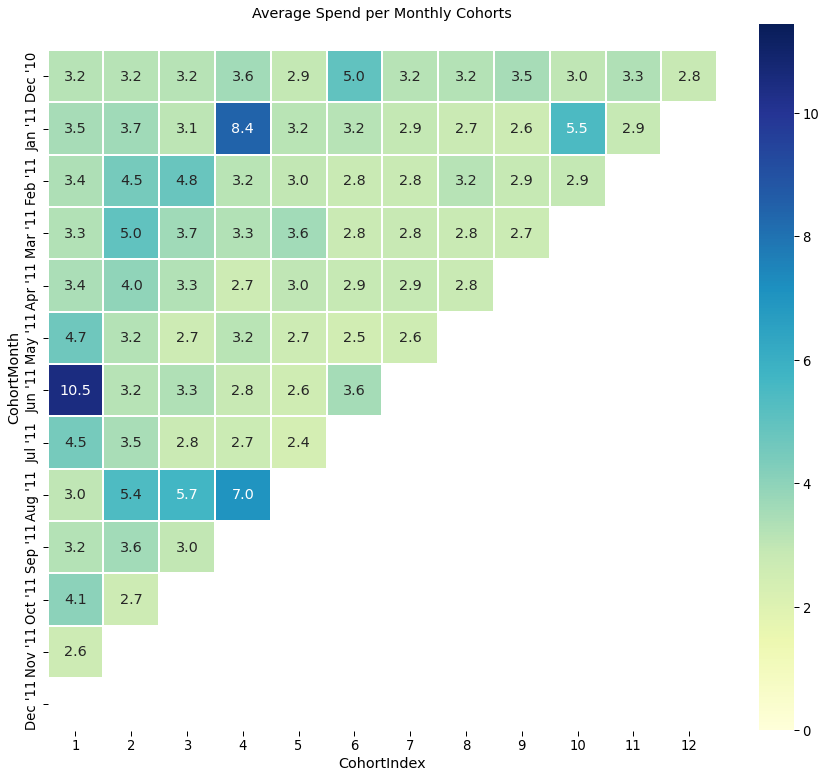

In [130]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

plt.title('Average Spend per Monthly Cohorts')
# Create the heatmap
ax = sns.heatmap(data = average_price,
            annot=True,
            vmin = 0.0,
#             vmax =20,
            cmap='YlGnBu',
            vmax = list(average_price.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

Calculate average quantity per cohort <br>


In [131]:
# Create a groupby object and pass the monthly cohort and cohort index as a list
grouping = cohort.groupby(['CohortMonth', 'CohortIndex']) 

# Calculate the average of the Quantity column
cohort_data = grouping['Quantity'].mean()

# Reset the index of cohort_data
cohort_data = cohort_data.reset_index()

# Create a pivot 
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date


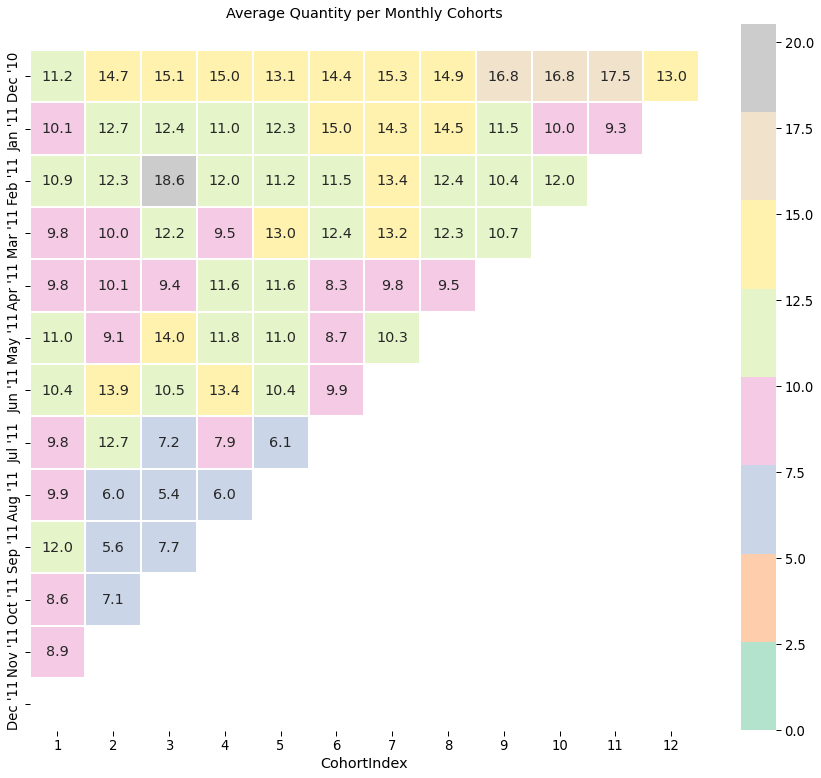

In [132]:
# Initialize plot figure
plt.figure(figsize=(15, 13))

# Add a title
plt.title('Average Quantity per Monthly Cohorts')

# Create the heatmap
ax  = sns.heatmap(data = average_quantity,
            annot=True,
            vmin = 0.0,
            cmap='Pastel2',
            vmax = list(average_quantity.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

# Project Task: Week 2
## Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP. <br><br>

2. Calculate RFM metrics. <br><br>

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

    b1. Combine three ratings to get a RFM segment (as strings).

    b2. Get the RFM score by adding up the three ratings.

    b3. Analyze the RFM segments by summarizing them and comment on the findings. <br><br>

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money



In [133]:
Segment =  ['Platinum Customers',
                     'Big Spenders',
                     'High Spend New Customers',
                     'Lowest-Spending Active Loyal Customers',
                     'Recent Customers',
                     'Good Customers Almost Lost', 
                     'Churned Best Customers',
                     'Lost Cheap Customers ']
RFM = [ 
               ['444', '443'],
               ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444'],
               ['413', '314', '313', '414'],
               ['331', '341', '431', '441'],
               ['422', '423', '424', '432', '433', '434', '442', '443', '444'], 
               ['244', '234', '243', '233'], 
               ['144', '134', '143', '133'], 
               ['122', '111', '121', '112', '221', '212', '211']
               ]
# Create a dictionary for each segment to map them against each customer
Description = ['Customers who bought most recently, most often and spend the most',
               'Customers who spend the most',
               'New Customers who spend the most',
               'Active Customers who buy very often but spend less ',
               'Customers who have purchased recently',
               'Customers who were frequent and good spenders who are becoming very inactive',
               'Customers who were frequent and good spenders who are lost contributing to attrition',
               'Customers who purchased long ago , less frequent and very little']

Marketing = ['No price incentives, New products and Loyalty Programs',
                      'Market your most expensive products',
                      'Price Incentives',
                      'Promote economical cost effective products in daily use',
                      'Discounts and promote a variety of product sells',
                      'Aggressive Price Incentives',
                      'Monitor close communication with customers with constant feedback and rework ',
                      'Dont spend too much time to re-acquire',
                      ]
rfm_segments = pd.DataFrame({'Segment': Segment , 'RFM' : RFM , 'Description': Description, 'Marketing': Marketing})
rfm_segments

,Segment,RFM,Description,Marketing
0,Platinum Customers,"[444, 443]","Customers who bought most recently, most often...","No price incentives, New products and Loyalty ..."
1,Big Spenders,"[114, 124, 134, 144, 214, 224, 234, 244, 314, ...",Customers who spend the most,Market your most expensive products
2,High Spend New Customers,"[413, 314, 313, 414]",New Customers who spend the most,Price Incentives
3,Lowest-Spending Active Loyal Customers,"[331, 341, 431, 441]",Active Customers who buy very often but spend ...,Promote economical cost effective products in ...
4,Recent Customers,"[422, 423, 424, 432, 433, 434, 442, 443, 444]",Customers who have purchased recently,Discounts and promote a variety of product sells
5,Good Customers Almost Lost,"[244, 234, 243, 233]",Customers who were frequent and good spenders ...,Aggressive Price Incentives
6,Churned Best Customers,"[144, 134, 143, 133]",Customers who were frequent and good spenders ...,Monitor close communication with customers wit...
7,Lost Cheap Customers,"[122, 111, 121, 112, 221, 212, 211]","Customers who purchased long ago , less freque...",Dont spend too much time to re-acquire


In [134]:
#last date available in our dataset
import datetime as dt
data['InvoiceDate'].max()

Timestamp('2011-11-30 17:42:00')

In [135]:
# Lets set this date as the today's date for further analysis
current_date = dt.date(2011,11,30)
current_date

datetime.date(2011, 11, 30)

In [136]:
# Lets create a date column for date values only
data['Purchase_Date'] = data.InvoiceDate.dt.date

In [137]:
recency = data.groupby('CustomerID')['Purchase_Date'].max().reset_index()
recency

,CustomerID,Purchase_Date
0,12346.0,2011-01-18
1,12347.0,2011-10-31
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
...,...,...
4326,18280.0,2011-03-07
4327,18281.0,2011-06-12
4328,18282.0,2011-08-09
4329,18283.0,2011-11-30


In [138]:
# Create a separate column for this date.
recency = recency.assign(Current_Date = current_date)
recency

,CustomerID,Purchase_Date,Current_Date
0,12346.0,2011-01-18,2011-11-30
1,12347.0,2011-10-31,2011-11-30
2,12348.0,2011-09-25,2011-11-30
3,12349.0,2011-11-21,2011-11-30
4,12350.0,2011-02-02,2011-11-30
...,...,...,...
4326,18280.0,2011-03-07,2011-11-30
4327,18281.0,2011-06-12,2011-11-30
4328,18282.0,2011-08-09,2011-11-30
4329,18283.0,2011-11-30,2011-11-30


In [139]:
# Compute the number of days since last purchase
recency['Recency'] = recency.Purchase_Date.apply(lambda x: (current_date - x).days)
current_date

datetime.date(2011, 11, 30)

In [140]:
recency.head()

,CustomerID,Purchase_Date,Current_Date,Recency
0,12346.0,2011-01-18,2011-11-30,316
1,12347.0,2011-10-31,2011-11-30,30
2,12348.0,2011-09-25,2011-11-30,66
3,12349.0,2011-11-21,2011-11-30,9
4,12350.0,2011-02-02,2011-11-30,301


In [141]:
# Drop the irrelevant Date columns
recency.drop(['Purchase_Date','Current_Date'], axis=1, inplace=True)
recency

,CustomerID,Recency
0,12346.0,316
1,12347.0,30
2,12348.0,66
3,12349.0,9
4,12350.0,301
...,...,...
4326,18280.0,268
4327,18281.0,171
4328,18282.0,113
4329,18283.0,0


#### **Frequency** <br>


In [142]:
frequency = data.groupby('CustomerID').InvoiceNo.nunique().reset_index().rename(columns={'InvoiceNo':'Frequency'})
frequency.max()

CustomerID    18287.0
Frequency       238.0
dtype: float64

#### **Monetary** <br>


In [143]:
# Create a separate column for Total Cost of Unit purchased
data['Total_cost'] = data.Quantity * data.UnitPrice
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,-1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom,2011-11-30,-0.85,2011-11-30,-0.85
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,-1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom,2011-11-30,-3.29,2011-11-30,-3.29
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,-1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom,2011-11-30,-1.25,2011-11-30,-1.25
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,-1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom,2011-11-30,-7.95,2011-11-30,-7.95


In [144]:
monetary = data.groupby('CustomerID').Total_cost.sum().reset_index().rename(columns={'Total_cost':'Monetary'})
monetary.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4085.18
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Now Combine all three to form an aggregated RFM Table    

In [145]:
rf = recency.merge(frequency, on='CustomerID')
rfm_table = rf.merge(monetary, on='CustomerID')

In [146]:
rfm_table.set_index('CustomerID',inplace=True)
rfm_table.head()
#rfm_table.Monetary.max()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40


#### RFM Table integrity Check


In [147]:
rfm_table.index[1]

12347.0

In [148]:
# Fetch the records corresponding to the first customer id in above table
data[data.CustomerID == rfm_table.index[1]]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,Purchase_Date,Total_cost
14938,537626,85116,BLACK CANDELABRA T-LIGHT HOLDER,12,2010-12-07 14:57:00,2.10,12347.0,Iceland,2010-12-07,25.2,2010-12-07,25.2
14939,537626,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2010-12-07 14:57:00,4.25,12347.0,Iceland,2010-12-07,17.0,2010-12-07,17.0
14940,537626,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,12,2010-12-07 14:57:00,3.25,12347.0,Iceland,2010-12-07,39.0,2010-12-07,39.0
14941,537626,22492,MINI PAINT SET VINTAGE,36,2010-12-07 14:57:00,0.65,12347.0,Iceland,2010-12-07,23.4,2010-12-07,23.4
14942,537626,22771,CLEAR DRAWER KNOB ACRYLIC EDWARDIAN,12,2010-12-07 14:57:00,1.25,12347.0,Iceland,2010-12-07,15.0,2010-12-07,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...
428999,573511,22196,SMALL HEART MEASURING SPOONS,24,2011-10-31 12:25:00,0.85,12347.0,Iceland,2011-10-31,20.4,2011-10-31,20.4
429000,573511,22195,LARGE HEART MEASURING SPOONS,24,2011-10-31 12:25:00,1.65,12347.0,Iceland,2011-10-31,39.6,2011-10-31,39.6
429001,573511,20719,WOODLAND CHARLOTTE BAG,10,2011-10-31 12:25:00,0.85,12347.0,Iceland,2011-10-31,8.5,2011-10-31,8.5
429002,573511,23162,REGENCY TEA STRAINER,8,2011-10-31 12:25:00,3.75,12347.0,Iceland,2011-10-31,30.0,2011-10-31,30.0


In [149]:
# Check if the number difference of days from the purchase date in original record is same as shown in rfm table.
(current_date - data[data.CustomerID == rfm_table.index[0]].iloc[0].Purchase_Date).days == rfm_table.iloc[0,0]



True

#### Customer segments with RFM Model <br>



In [150]:
# RFM Quantiles
quantiles = rfm_table.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,15.0,1.0,288.755
0.50,48.0,3.0,628.780
0.75,144.0,5.0,1545.905


In [151]:
# Let's convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles
rfm_table

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,316,2,0.00
12347.0,30,6,4085.18
12348.0,66,4,1797.24
12349.0,9,1,1757.55
12350.0,301,1,334.40
...,...,...,...
18280.0,268,1,180.60
18281.0,171,1,80.82
18282.0,113,2,98.76


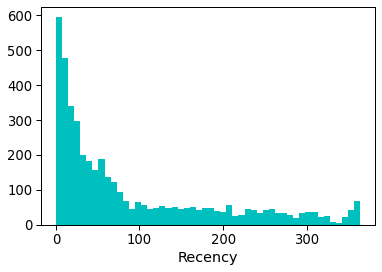

In [152]:
#Let us visualize the histogram charts for Recency, Frequency and Monetary
plt.hist(rfm_table.Recency, bins = 50, color='c')
plt.xlabel('Recency')
plt.show()

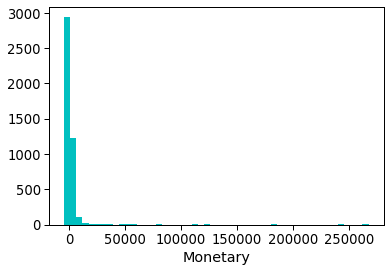

In [153]:
plt.hist(rfm_table.Monetary, bins = 50, color='c')
plt.xlabel('Monetary')
plt.show()

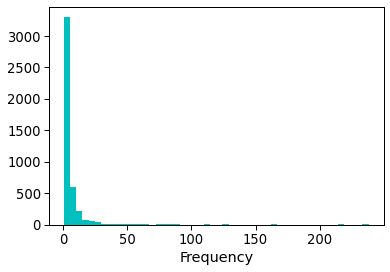

In [154]:
plt.hist(rfm_table.Frequency, bins = 50, color='c')
plt.xlabel('Frequency')
plt.show()

Creation of RFM Segments <br>
We will create two segmentation classes since, high recency is bad, while high frequency and monetary value is good

In [155]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, k = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
rfm_segment = rfm_table.copy()
rfm_segment['R_Quartile'] = rfm_segment['Recency'].apply(RScore, args=('Recency',quantiles,))
rfm_segment['F_Quartile'] = rfm_segment['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
rfm_segment['M_Quartile'] = rfm_segment['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [156]:
rfm_segment.head()
rfm_segment[rfm_segment.Monetary == rfm_segment.Monetary.max()]
rfm_segment

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,316,2,0.00,1,2,1
12347.0,30,6,4085.18,3,4,4
12348.0,66,4,1797.24,2,3,4
12349.0,9,1,1757.55,4,1,4
12350.0,301,1,334.40,1,1,2
...,...,...,...,...,...,...
18280.0,268,1,180.60,1,1,1
18281.0,171,1,80.82,1,1,1
18282.0,113,2,98.76,2,2,1


In [157]:
rfm_segment['RFMScore'] = rfm_segment.R_Quartile.map(str) \
                            + rfm_segment.F_Quartile.map(str) \
                            + rfm_segment.M_Quartile.map(str)
rfm_segment.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,316,2,0.00,1,2,1,121
12347.0,30,6,4085.18,3,4,4,344
12348.0,66,4,1797.24,2,3,4,234
12349.0,9,1,1757.55,4,1,4,414
12350.0,301,1,334.40,1,1,2,112


    1.Best Recency score = 4 (most recently purchase)
    2.Best Frequency score = 4 (most frequently purchase)
    3.Best Monetary score = 4 (who spent the most)

#### **RFM Segment allocation** <br>


In [158]:
# Reset the index to create a customer_ID column
rfm_segment.reset_index(inplace=True)

In [159]:
import itertools

# Highest frequency as well as monetary value with least recencycy
platinum_customers = ['444', '443']
print ("Platinum Customers                     : {}".format(platinum_customers)) 

# Get all combinations of [1, 2, 3,4] and length 2 
big_spenders_comb =  itertools.product([1, 2, 3,4],repeat = 2)   
# Print the obtained combinations 
big_spenders = []
for i in list(big_spenders_comb): 
    item = (list(i))
    item.append(4)
    big_spenders.append( ("".join(map(str,item))))
print ("Big Spenders                           : {}".format(big_spenders))

#High-spending New Customers – This group consists of those customers in 1-4-1 and 1-4-2.
#These are customers who transacted only once, but very recently and they spent a lot

high_spend_new_customers = ['413', '314' ,'313','414'] 
print ("High Spend New Customers               : {}".format(high_spend_new_customers)) 


lowest_spending_active_loyal_customers_comb =  itertools.product([ 3,4], repeat = 2)
lowest_spending_active_loyal_customers = []
for i in list(lowest_spending_active_loyal_customers_comb): 
    item = (list(i))
    item.append(1)
    lowest_spending_active_loyal_customers.append( ("".join(map(str,item))))
print ("Lowest Spending Active Loyal Customers : {}".format(lowest_spending_active_loyal_customers))

recent_customers_comb =  itertools.product([ 2,3,4], repeat = 2)
recent_customers = []
for i in list(recent_customers_comb): 
    item = (list(i))
    item.insert(0,4)
    recent_customers.append( ("".join(map(str,item))))
print ("Recent Customers                       : {}".format(recent_customers))




almost_lost = ['244', '234', '243', '233']        #  Low R - Customer's shopping less often now who used to shop a lot  
print ("Good Customers Almost Lost             : {}".format(almost_lost)) 

churned_best_customers = ['144', '134' ,'143','133'] 
print ("Churned Best Customers                 : {}".format(churned_best_customers)) 


lost_cheap_customers = ['122','111' ,'121','112','221','212' ,'211'] # Customer's shopped long ago but with less frequency and monetary value
print ("Lost Cheap Customers                   : {}".format(lost_cheap_customers))


Platinum Customers                     : ['444', '443']
Big Spenders                           : ['114', '124', '134', '144', '214', '224', '234', '244', '314', '324', '334', '344', '414', '424', '434', '444']
High Spend New Customers               : ['413', '314', '313', '414']
Lowest Spending Active Loyal Customers : ['331', '341', '431', '441']
Recent Customers                       : ['422', '423', '424', '432', '433', '434', '442', '443', '444']
Good Customers Almost Lost             : ['244', '234', '243', '233']
Churned Best Customers                 : ['144', '134', '143', '133']
Lost Cheap Customers                   : ['122', '111', '121', '112', '221', '212', '211']


In [160]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Platinum Customers':platinum_customers,      
    'Big Spenders':      big_spenders,
    'High Spend New Customers':high_spend_new_customers,
    'Lowest-Spending Active Loyal Customers' : lowest_spending_active_loyal_customers ,
    'Recent Customers': recent_customers,
    'Good Customers Almost Lost':almost_lost,       
    'Churned Best Customers':   churned_best_customers, 
    'Lost Cheap Customers ': lost_cheap_customers, 
}

In [161]:
# Allocate segments to each customer as per the RFM score mapping
def find_key(value):
    for k, v in segment_dict.items():
        if value in v:
            return k
rfm_segment['Segment'] = rfm_segment.RFMScore.map(find_key)

# Allocate all remaining customers to others segment category
rfm_segment.Segment.fillna('others', inplace=True)
rfm_segment.sample(10)


,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
108,12483.0,8,13,2327.13,4,4,4,444,Platinum Customers
109,12484.0,23,8,4480.87,3,4,4,344,Big Spenders
291,12708.0,20,16,2616.32,3,4,4,344,Big Spenders
2178,15320.0,35,1,267.13,3,1,1,311,others
1800,14803.0,153,3,845.55,1,2,3,123,others
3603,17289.0,22,4,922.77,3,3,3,333,others
428,12897.0,195,2,216.50,1,2,1,121,Lost Cheap Customers
3053,16513.0,10,2,662.79,4,2,3,423,Recent Customers
2435,15667.0,30,1,301.32,3,1,2,312,others
1046,13761.0,41,2,1070.65,3,2,3,323,others


In [167]:
# Best Customers who's recency, frequency as well as monetary attribute is highest.
rfm_segment[rfm_segment.RFMScore=='444'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
1685,14646.0,7,74,267761.00,4,4,4,444,Platinum Customers
4193,18102.0,2,59,244952.95,4,4,4,444,Platinum Customers
3722,17450.0,1,54,185759.77,4,4,4,444,Platinum Customers
1876,14911.0,0,238,125482.36,4,4,4,444,Platinum Customers
54,12415.0,15,26,123725.45,4,4,4,444,Platinum Customers


In [168]:
# Biggest spenders
rfm_segment[rfm_segment.RFMScore=='334'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2765,16126.0,20,4,6287.77,3,3,4,334,Big Spenders
12,12359.0,48,5,6274.23,3,3,4,334,Big Spenders
727,13316.0,28,5,5570.69,3,3,4,334,Big Spenders
2894,16303.0,16,4,5305.83,3,3,4,334,Big Spenders
2868,16258.0,36,5,5203.51,3,3,4,334,Big Spenders


In [169]:
# customers that you must retain are those whose monetary and frequency was high but recency reduced quite a lot recently
rfm_segment[rfm_segment.RFMScore=='244'].sort_values('Monetary', ascending=False).head()

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
457,12939.0,55,8,11581.80,2,4,4,244,Big Spenders
49,12409.0,69,7,11056.93,2,4,4,244,Big Spenders
2807,16180.0,91,10,10217.48,2,4,4,244,Big Spenders
1776,14769.0,68,9,10041.86,2,4,4,244,Big Spenders
3215,16745.0,77,18,7157.10,2,4,4,244,Big Spenders


In [170]:
rfm_segment.to_excel('RFM Segment.xlsx')

In [171]:
rfm_segment.Segment.value_counts()
rfm_segment.Recency

0       316
1        30
2        66
3         9
4       301
       ... 
4326    268
4327    171
4328    113
4329      0
4330     33
Name: Recency, Length: 4331, dtype: int64

## Project Task: Week 3
### Data Modeling :

#### 1. Create clusters using k-means clustering algorithm.

a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

b. Decide the optimum number of clusters to be formed.

c. Analyze these clusters and comment on the results.

#### a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

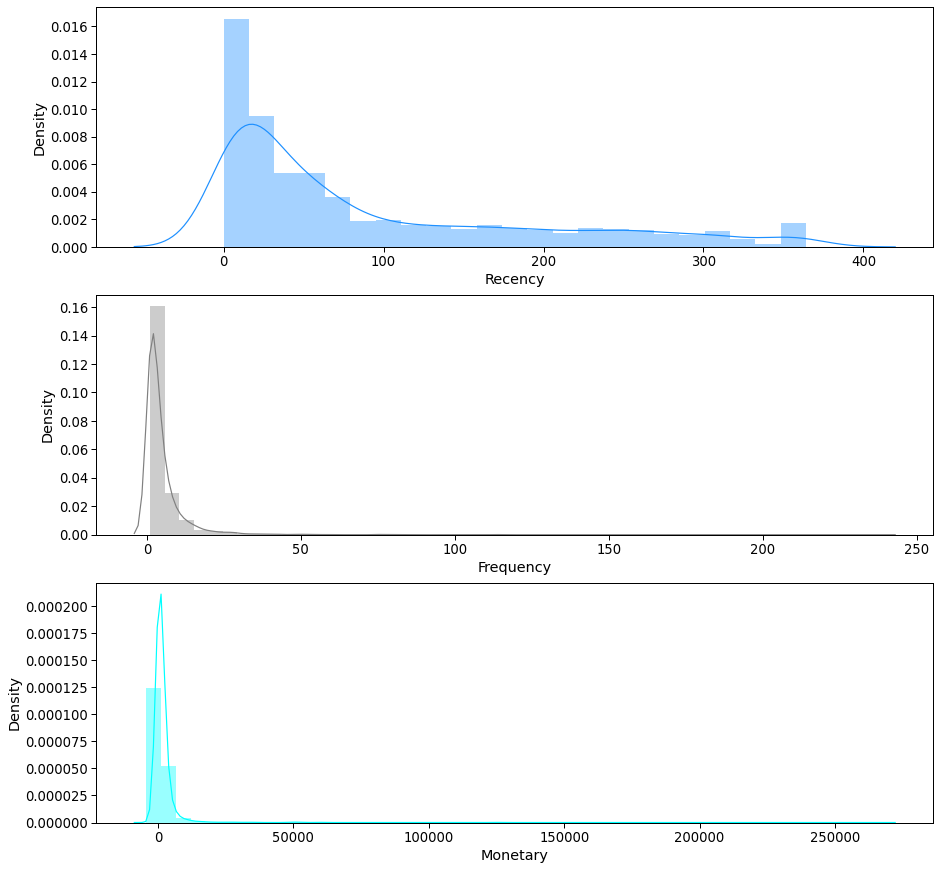

In [172]:
# Distribution plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_table.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_table.Frequency , color="grey", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_table.Monetary , color="cyan", ax=axes[2], axlabel='Monetary')
plt.show();

Here we can observe that the data is highly skewed. So we have to transform and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.

In [173]:
# Let's describe the table to see if there are any negative values
rfm_table.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,90.277303,4.910875,1832.597551
std,99.389069,9.025901,7944.283177
min,0.000000,1.000000,-4287.630000
25%,15.000000,1.000000,288.755000
50%,48.000000,3.000000,628.780000
75%,144.000000,5.000000,1545.905000
max,364.000000,238.000000,267761.000000


We can observe that Monetary contains negative values. So first we need to make sure that minimum range of value starts from 1 otherwise log transformation may lead to errors in graph plotting as well as K-Means clustering. After that we will utilize log transformation and scaling to make data available for for K-Means clustering

In [174]:
# Create a copy of rfm table
rfm_table_scaled = rfm_table.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4331.000000,4331.000000,4331.000000
mean,91.277303,4.910875,6121.227551
std,99.389069,9.025901,7944.283177
min,1.000000,1.000000,1.000000
25%,16.000000,1.000000,4577.385000
50%,49.000000,3.000000,4917.410000
75%,145.000000,5.000000,5834.535000
max,365.000000,238.000000,272049.630000


In [175]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

In [176]:
normal_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,1.386976,-0.369465,-0.687546
12347.0,-0.198501,0.790665,1.180610
12348.0,0.327082,0.362496,0.289615
12349.0,-0.970062,-1.101426,0.271348
12350.0,1.353919,-1.101426,-0.477924
...,...,...,...
18280.0,1.275007,-1.101426,-0.572384
18281.0,0.970027,-1.101426,-0.635422
18282.0,0.689543,-0.369465,-0.623983


Visualize the data after applying logarathmic transformation on scaled data. 
Observe that the skewness is reduced

C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Shreya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

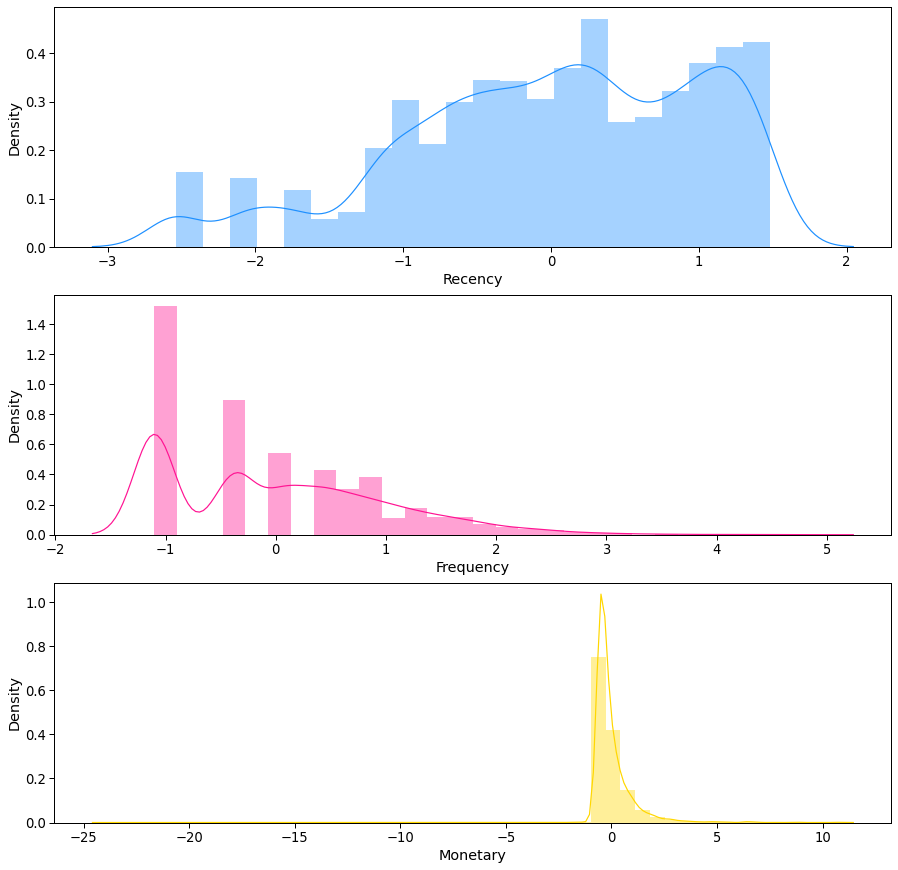

In [74]:
# Distribution plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

#### b. Decide the optimum number of clusters to be formed.

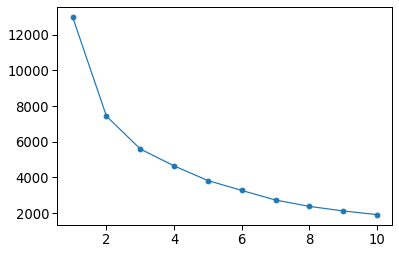

In [177]:
# find WCSS 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');


In [179]:
#copy this data to an Excel sheet.
ElbowPlot = pd.DataFrame({'Cluster': range(1,11) , 'SSE': wcss})
ElbowPlot.to_excel('Elbow Plot Data.xlsx')

##### b.2 Silhouette Score

Silhouette score for number of cluster(s) 3: 0.3947454614514734
Silhouette score for number of cluster(s) 4: 0.34984009502580043
Silhouette score for number of cluster(s) 5: 0.3600617831786827
Silhouette score for number of cluster(s) 6: 0.36209423197290214
Silhouette score for number of cluster(s) 7: 0.3570394541175927
Silhouette score for number of cluster(s) 8: 0.3441550819272379
Silhouette score for number of cluster(s) 9: 0.3489031730303187
Silhouette score for number of cluster(s) 10: 0.3565626808393854
Silhouette score for number of cluster(s) 11: 0.3557950595147288


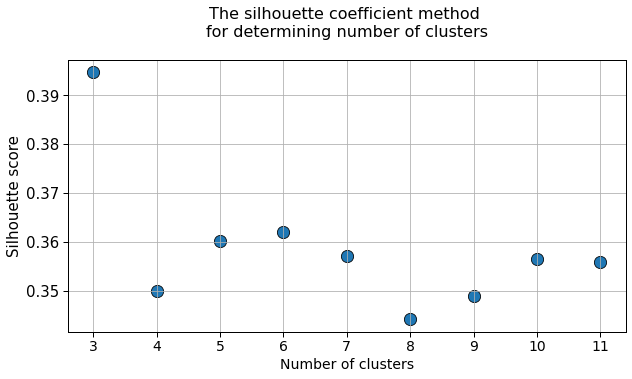

In [180]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(3,12):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(10,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(3,12)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(3,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

Here we can clearly see that optimum number of cluster should be 4 

Now let's apply K-Means on 4 clusters to segregate the customer base

In [181]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [182]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [183]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segment.shape}")

Shape of cluster label array is (4331,)
Shape of RFM segment dataframe is (4331, 9)


In [184]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segment.assign(Cluster = cluster_labels)

In [185]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

2    1941
3    1187
0    1013
1     190
Name: Cluster, dtype: int64

In [186]:
Cluster_table.sample(10)
print ("Platinum customers belong to cluster                      : {} ".format(Cluster_table[Cluster_table['Segment']=='Platinum Customers']['Cluster'].unique()))
print ("Big Spenders belong to cluster                            : {} ".format(Cluster_table[Cluster_table['Segment']=='Big Spenders']['Cluster'].unique()))
print ("High Spend new Customers belong to cluster                : {} ".format(Cluster_table[Cluster_table['Segment']=='High Spend New Customers']['Cluster'].unique()))
print ("Lowest-Spending Active Loyal Customers belong to cluster  : {} ".format(Cluster_table[Cluster_table['Segment']=='Lowest-Spending Active Loyal Customers']['Cluster'].unique()))
print ("Recent Customers belong to cluster                        : {} ".format(Cluster_table[Cluster_table['Segment']=='Recent Customers']['Cluster'].unique()))
print ("Good Customers Almost Lost belong to cluster              : {} ".format(Cluster_table[Cluster_table['Segment']=='Good Customers Almost Lost']['Cluster'].unique()))
print ("Churned Best Customers belong to cluster                  : {} ".format(Cluster_table[Cluster_table['Segment']=='Churned Best Customers']['Cluster'].unique()))
print ("Lost Cheap customers belong to cluster                    : {} ".format(Cluster_table[Cluster_table['Segment']=='Lost Cheap Customers ']['Cluster'].unique()))


Platinum customers belong to cluster                      : [3 1] 
Big Spenders belong to cluster                            : [3 0 2 1] 
High Spend new Customers belong to cluster                : [0 2] 
Lowest-Spending Active Loyal Customers belong to cluster  : [0 3] 
Recent Customers belong to cluster                        : [0 3] 
Good Customers Almost Lost belong to cluster              : [2 3 0] 
Churned Best Customers belong to cluster                  : [2 3] 
Lost Cheap customers belong to cluster                    : [2 0] 


Here we can observe that RFM score is very low for customers in 0 & 3 cluster. Comparetivey, customers in 1&2 clusters have high RFM scores along with above average Recency and frequency values.

Let's checkout customers in each cluster more closely

In [187]:
Cluster_table[Cluster_table.Cluster == 3].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
448,12928.0,26,5,2062.70,3,3,4,334,Big Spenders,3
3337,16907.0,20,5,928.76,3,3,3,333,others,3
3382,16966.0,6,9,1762.67,4,4,4,444,Platinum Customers,3
1299,14112.0,13,12,2774.17,4,4,4,444,Platinum Customers,3
1060,13784.0,0,11,2462.79,4,4,4,444,Platinum Customers,3


Here it can be seen that the RFM score for Cluster 3 customers with low recency, good frequency and high monetary value, These are the loyal customers to the firm.




In [188]:
Cluster_table[Cluster_table.Cluster == 2].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1755,14740.0,182,4,1423.21,1,3,3,133,Churned Best Customers,2
1026,13737.0,191,1,339.60,1,1,2,112,Lost Cheap Customers,2
2129,15254.0,118,1,300.36,2,1,2,212,Lost Cheap Customers,2
1677,14638.0,41,1,443.60,3,1,2,312,others,2
1989,15071.0,84,2,982.07,2,2,3,223,others,2


In [189]:
Cluster_table[Cluster_table.Cluster == 1].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
457,12939.0,55,8,11581.80,2,4,4,244,Big Spenders,1
3272,16814.0,5,22,6408.20,4,4,4,444,Platinum Customers,1
1892,14936.0,0,9,8117.42,4,4,4,444,Platinum Customers,1
491,12989.0,12,16,6786.58,4,4,4,444,Platinum Customers,1
1994,15078.0,2,35,8800.27,4,4,4,444,Platinum Customers,1


In [191]:
Cluster_table[Cluster_table.Cluster == 0].sample(5)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
123,12504.0,9,4,114.00,4,3,1,431,Lowest-Spending Active Loyal Customers,0
3417,17022.0,22,1,71.00,3,1,1,311,others,0
1916,14971.0,26,3,1097.98,3,2,3,323,others,0
3320,16884.0,28,2,429.84,3,2,2,322,others,0
2886,16284.0,22,2,812.68,3,2,3,323,others,0


#### Scatter Plot to visualize the division of customers into different segments based on the RFM atributes.

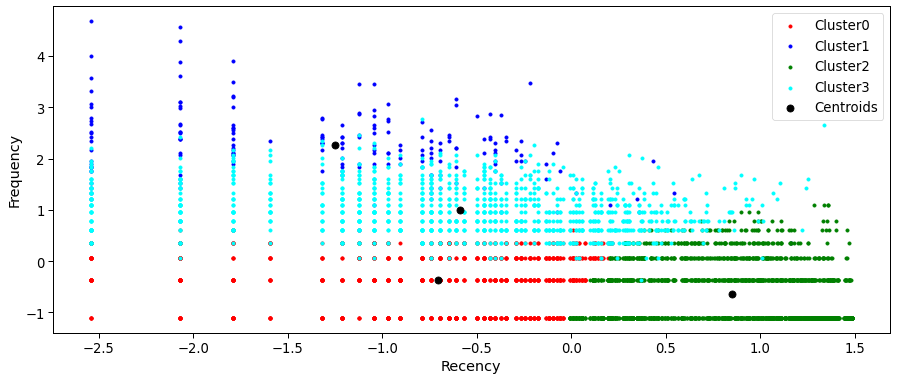

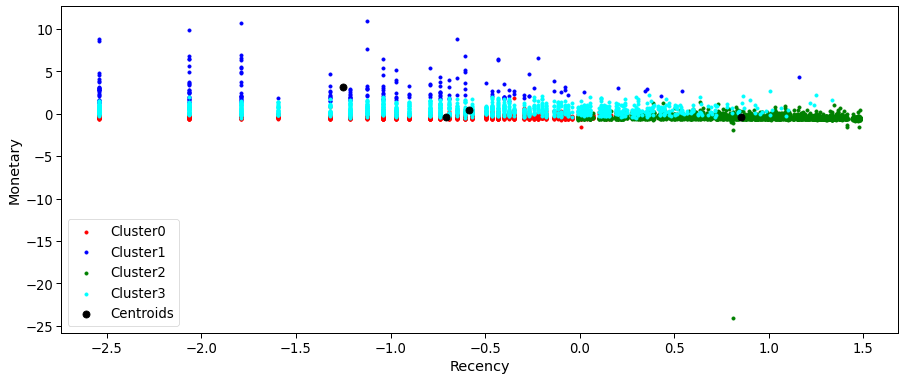

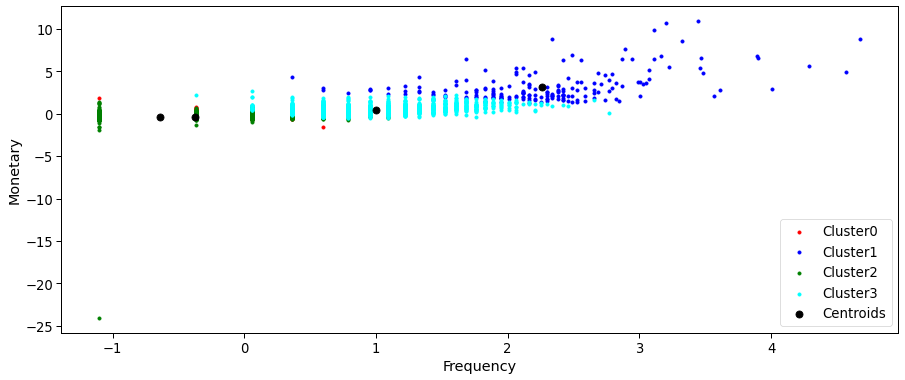

In [192]:
# Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();

In [193]:
Cluster_table.to_excel('RFMSegment.xlsx')


#### Heat Map




In [194]:
# Assign Cluster labels to RFM table
rfm_table_cluster = rfm_table.assign(Cluster = cluster_labels)

# Average attributes for each cluster
cluster_avg = rfm_table_cluster.groupby(['Cluster']).mean() 

# Calculate the population average
population_avg = rfm_table.mean()

# Calculate relative importance of attributes by 
relative_imp = cluster_avg / population_avg - 1


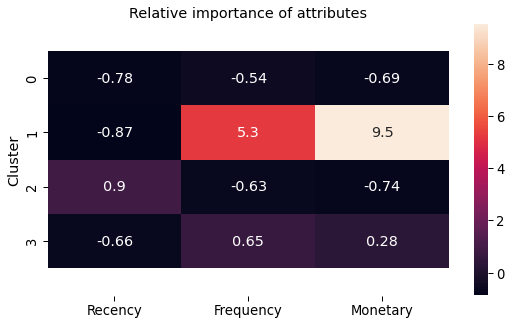

In [196]:
plt.figure(figsize=(9, 5))
plt.title('Relative importance of attributes')

ax = sns.heatmap(relative_imp, annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

# TABLEAU

## Project Task: Week 4
## Data Reporting:

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

    b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

    c. Bar graph to show the count of orders vs. hours throughout the day

    d. Plot the distribution of RFM values using histogram and frequency charts

    e. Plot error (cost) vs. number of clusters selected

    f. Visualize to compare the RFM values of the clusters using heatmap

In [197]:
data.to_excel('TableauSource.xlsx')

## User Interactive Online Retail Story Board for UK Retail Store

   ### 1.  Retail Dashboard
        a.  Country Wise Analysis
        b. Top Products by Sales
        c. Top Products by Count
        d. Monthly Figures
        e.Count of orders Vs Hours Throughout the Day
        f. Elbow Plot -Error Cost against the no of clusters
        g. Recency Histogram
        h. Customer Segments
        i.FM Heat Map
        j. RM HEat Map

  ###  2. RFM Cluster Analysis Dashboard
        a. Geographical Visualisation
        b. Cost Vs No of clusters
        c. Frequency Sum Vs Clusters
        d. RF Heat Map
        e. RF Plot
        f. FM Plot
        g. RM Plot
        h. Cluster View

[Click here for the TABLEAU Visualization Public Link]( https://public.tableau.com/app/profile/sai.praneeth.reddy.maram/viz/OnlineRetailCapstoneVisualization_16898304745370/RETAILDASHBOARD?publish=yes )